# APS 3

___

####  <font style='font-family:Georgia' color='darkturquoise'> Arthur

### Importando bibliotecas e valores

In [442]:
from funcoesTermosol import *
import numpy as np
import math
from time import perf_counter

In [443]:
def matprint(mat, fmt="g"):        # Credits to braingineer https://gist.github.com/braingineer/d801735dac07ff3ac4d746e1f218ab75
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

### Representação da estrutura

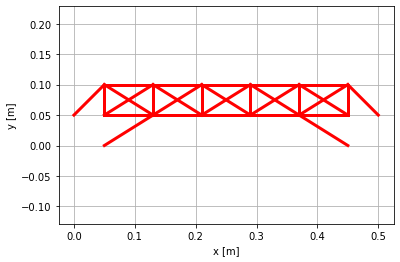

In [444]:
entrada = "entradaFinal.xlsx"

[nn,N,nm,Inc,nc,F,nr,R] = importa(entrada)

plota(N, Inc)
# geraSaida()

### Informações sobre a treliça

* nn: número de nós
* N: Matriz dos nós
* nm: número de membros
* Inc: Matriz de incidência. Colunas:
    1. Nó 1
    2. Nó 2
    3. E
    4. A
* nc: número de cargas
* F: forças (Vetor carregamento)
* nr: número de restrições
* R: Restrições (Vetor com os graus de liberdade)

In [445]:
# Comprimento 
L = 4
#numero de nodes
n = 8

### Gerando a matriz de conectividade transposta

In [446]:
C = []
for i in range(nm):
        C_i = nn*[0]

        no_1 = int(Inc[i, 0])
        no_2 = int(Inc[i, 1])

        C_i[no_1-1] = -1
        C_i[no_2-1] = 1
        C.append(C_i) 

C_t = np.array(C).T
matprint(C_t)

 0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
-1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0   0   0  -1   0  
 1  -1   0   0   0   0   0   0   0   0   0   1  -1   0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0  
 0   1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  -1  -1   0   0   0  
 0   0   1  -1   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0  -1   0   0  
 0   0   0   1  -1   0   0   0   0   0   0   0   0   0   1  -1   0   0  -1   0   0   0   0   1   0   0   0   0   0   0  
 0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0  -1  
 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0  -1   0   0  

### Matriz dos membros (M)

In [447]:
M = np.matmul(N, C_t)
print(M)

[[ 0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.05  0.08
   0.08  0.08  0.08  0.08  0.05  0.08  0.08  0.    0.    0.    0.    0.
   0.    0.08 -0.08  0.08  0.08 -0.08]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.05 -0.05
   0.05 -0.05 -0.05  0.05 -0.05  0.05 -0.05  0.05 -0.05 -0.05 -0.05 -0.05
  -0.05  0.05  0.05  0.05  0.05  0.05]]


### Obtendo Se, Ke e Kg

In [448]:
len_linhas_M = len(M)
len_linhas_C = len(C_t)
Kg = np.zeros((nn*2, nn*2))
for i in range(0, nm):
    E = Inc[i,2]
    A = Inc[i,3]
    
    n1 = Inc[i,0]
    n2 = Inc[i,1]
    
    x1 = N[0][int(Inc[:,0][i])-1]
    y1 = N[1][int(Inc[:,0][i])-1]
    x2 = N[0][int(Inc[:,1][i])-1]
    y2 = N[1][int(Inc[:,1][i])-1]    
    
    L = math.sqrt(((x1-x2)**2+(y1-y2)**2))
    
    const = E*A/L
    
    M_aux = M[:,i]
    M_aux.shape = [len_linhas_M, 1]
    M_aux2 = np.transpose(M_aux)
    Se = (const * np.matmul(M_aux, M_aux2)) / (np.linalg.norm(M[:,i])**2)

    C_aux = C_t[:,i]
    C_aux.shape = [len_linhas_C, 1]
    C_aux2 = np.transpose(C_aux)
    
    multi_C_aux = np.matmul(C_aux, C_aux2)
    Ke = np.kron(multi_C_aux, Se)
    Kg += Ke
# print(Se)
print(Kg)

[[ 16970562.74847713  16970562.74847713         0.         ...
          0.                 0.                 0.        ]
 [ 16970562.74847713  16970562.74847713         0.         ...
          0.                 0.                 0.        ]
 [        0.                 0.          48293895.99651426 ...
          0.                 0.                 0.        ]
 ...
 [        0.                 0.                 0.         ...
    7146053.12363838         0.                 0.        ]
 [        0.                 0.                 0.         ...
          0.          18293895.99651426 -11433684.99782141]
 [        0.                 0.                 0.         ...
          0.         -11433684.99782141   7146053.12363838]]


### Deslocamento nodal

Aplicando as condições de contorno para a matriz das forças:

In [449]:
F_c = np.delete(F, R.astype(int))
F_c


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 75.,  0., 75.,  0.,  0.,  0.,  0.])

Aplicando as condições de contorno para a matriz da rigidez:

In [450]:
Kg_c = np.delete(Kg, R.astype(int),0)
Kg_c = np.delete(Kg_c, R.astype(int), 1)
matprint(Kg_c)

 4.82939e+07        -3e+07             0             0             0             0             0             0             0             0             0             0  -1.82939e+07  -1.14337e+07             0             0             0             0             0             0             0             0  
      -3e+07   1.14882e+08   1.14337e+07        -3e+07             0             0             0             0             0             0  -1.82939e+07   1.14337e+07             0             0  -1.82939e+07  -1.14337e+07             0             0             0             0             0             0  
           0   1.14337e+07   6.94382e+07             0             0             0             0             0             0             0   1.14337e+07  -7.14605e+06             0      -4.8e+07  -1.14337e+07  -7.14605e+06             0             0             0             0             0             0  
           0        -3e+07             0   9.65878e+07             0     

___
**Funções de Jacobi e Gauss-Seidel utilizadas na aula 21:**

In [451]:
# def jacobi(k,F,ite,tol):
#     #inicializando X com 
#     x = np.zeros(k.shape[0])

#     # Cria um vetor com os elementos da diagonal de k                       
#     diagonal = np.diag(k)
#     # Subtrai a diagonal de K
#     k_d = k - np.diagflat(diagonal)
#     # loop até chegar abaixo da tolerância ou passar do número máximo de iterações
#     for i in range(ite):
#         x2 = (F - np.matmul(k_d,x)) / diagonal
#         error =  max(abs((x2 - x)/x2) )
#         if error < tol:
#             print(f"Erro máximo: {error}")
#             print(f"Convergiu na iteração: {i}")
#             return x2
        
#         x = x2
#     return x
def jacobi(K,F,ite,tol):
    if type(K) != list:
        U = np.zeros((K.shape[0],1))
        n = K.shape[0]
    else:
        U = np.zeros((len(K),1))
        n = len(K)
    U_ = U.copy()
    count = 0
    while count < ite:
        for i in range(n):
            U_[i][0] = F[i]
            for j in range(n):
                if j != i:
                    U_[i][0] -= K[i][j] * U[j][0]
            U_[i][0] /= K[i][i]

        if 0 not in U:     # Cálculo do erro
            ERROR_list = []
            for i,j in zip(U_,U):
                ERROR_list.append(abs((i-j)/j))
            ERRO = max(ERROR_list)
            if ERRO < tol:
                print("Iterações: {0}".format(count))
                return U;
        U = U_.copy() 
        count += 1
    print("Iterações: {0}".format(count))
    return U;

In [452]:
# def gauss_seidel(A, b, ite, tol):
#     x = np.zeros_like(b, dtype=np.double)
    
#     #Iterate
#     for k in range(ite):
        
#         x_old  = x.copy()
        
#         #Loop over rows
#         for i in range(A.shape[0]):
#             x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], x_old[(i+1):])) / A[i ,i]
            
#         #Stop condition 
#         if np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf) < tol:
#             break
            
#     return x
def gauss_seidel(K,F,ite,tol):
    if type(K) != list:
        U = np.zeros((K.shape[0],1))
        n = K.shape[0]
    else:
        U = np.zeros((len(K),1))
        n = len(K)
    U_ = U.copy()
    count = 0
    while count < ite:
        for i in range(n):
            U_[i][0] = F[i]
            for j in range(n):
                if j != i:
                    U_[i][0] -= K[i][j] * U_[j][0]
            U_[i][0] /= K[i][i]

        if 0 not in U:     # Cálculo do erro
            ERROR_list = []
            for i,j in zip(U_,U):
                ERROR_list.append(abs((i-j)/j))
            ERRO = max(ERROR_list)
            if ERRO < tol:
                print("Iterações: {0}".format(count))
                return U;
        U = U_.copy() 
        count += 1
    print("Iterações: {0}".format(count))
    return U;

___
Utilizando Jacobi, Gauss-Seidel e a forma geral para cálculo da matriz **U**

In [453]:
u_jacobi = jacobi(Kg_c, F_c, 1000, 1e-5)
print("Método Jacobi:")
timer_start = perf_counter()
matprint(jacobi(Kg_c, F_c,1000, 1e-5))
print("Tempo: {0}".format(perf_counter() - timer_start))

Iterações: 425
Método Jacobi:
Iterações: 425
  2.1178e-06  
 1.86405e-06  
 6.86966e-06  
 2.28434e-06  
 1.81262e-05  
 4.51815e-07  
 1.89259e-05  
 3.37058e-07  
 8.47579e-06  
 4.98641e-06  
-1.66917e-06  
 5.13337e-07  
-2.05502e-06  
 7.34235e-06  
-7.23277e-07  
 1.83898e-05  
 2.90908e-06  
 1.91968e-05  
 4.81284e-06  
 8.78521e-06  
  5.0977e-06  
 1.11284e-07  
Tempo: 0.27634764899266884


In [454]:
u_gauss = gauss_seidel(Kg_c, F_c, 1000, 1e-5)
print("Método Gauss-Seidel:")
timer_start = perf_counter()
matprint(gauss_seidel(Kg_c, F_c, 1000, 1e-5))
print("Tempo: {0}".format(perf_counter() - timer_start))

Iterações: 214
Método Gauss-Seidel:
Iterações: 214
  2.1178e-06  
 1.86405e-06  
 6.86967e-06  
 2.28434e-06  
 1.81262e-05  
 4.51818e-07  
  1.8926e-05  
 3.37057e-07  
 8.47581e-06  
 4.98642e-06  
-1.66918e-06  
 5.13338e-07  
-2.05503e-06  
 7.34236e-06  
-7.23283e-07  
 1.83898e-05  
 2.90908e-06  
 1.91968e-05  
 4.81285e-06  
 8.78524e-06  
 5.09772e-06  
 1.11285e-07  
Tempo: 0.12710830199648626


**Deslocamentos nodais**

In [455]:
U_ar = np.linalg.solve(Kg_c, F_c)
U_ar

array([ 2.11792048e-06,  1.86415248e-06,  6.86989241e-06,  2.28448247e-06,
        1.81267692e-05,  4.51913179e-07,  1.89266348e-05,  3.37123775e-07,
        8.47619883e-06,  4.98669145e-06, -1.66919717e-06,  5.13343895e-07,
       -2.05504512e-06,  7.34258803e-06, -7.23256265e-07,  1.83903779e-05,
        2.90922528e-06,  1.91974594e-05,  4.81307868e-06,  8.78562867e-06,
        5.09798169e-06,  1.11290239e-07])

**Ajustando o tamanho das matrizes U**

In [456]:
u_jacobi_ajustado = np.zeros((nn*2,1))
i = 0
for e in range(len(u_jacobi_ajustado)):
    if e not in R:
        u_jacobi_ajustado[e] += u_jacobi[i]
        i += 1
u_jacobi_ajustado

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 2.11780377e-06],
       [ 0.00000000e+00],
       [ 1.86404526e-06],
       [ 6.86966442e-06],
       [ 2.28434163e-06],
       [ 1.81261593e-05],
       [ 4.51815499e-07],
       [ 1.89259318e-05],
       [ 3.37057530e-07],
       [ 8.47579448e-06],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 4.98641325e-06],
       [ 0.00000000e+00],
       [-1.66917484e-06],
       [ 5.13336526e-07],
       [-2.05502344e-06],
       [ 7.34234572e-06],
       [-7.23276762e-07],
       [ 1.83897926e-05],
       [ 2.90907559e-06],
       [ 1.91967783e-05],
       [ 4.81284030e-06],
       [ 8.78521374e-06],
       [ 5.09770140e-06],
       [ 1.11284427e-07],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])

In [457]:
u_gauss_ajustado = np.zeros((nn*2,1))
i = 0
for e in range(len(u_gauss_ajustado)):
    if e not in R:
        u_gauss_ajustado[e] += u_gauss[i]
        i += 1
u_gauss_ajustado

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 2.11780029e-06],
       [ 0.00000000e+00],
       [ 1.86404659e-06],
       [ 6.86967286e-06],
       [ 2.28434194e-06],
       [ 1.81261835e-05],
       [ 4.51817824e-07],
       [ 1.89259626e-05],
       [ 3.37057451e-07],
       [ 8.47581486e-06],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 4.98642394e-06],
       [ 0.00000000e+00],
       [-1.66917983e-06],
       [ 5.13337597e-07],
       [-2.05502853e-06],
       [ 7.34235541e-06],
       [-7.23283091e-07],
       [ 1.83898224e-05],
       [ 2.90907967e-06],
       [ 1.91968166e-05],
       [ 4.81285090e-06],
       [ 8.78523819e-06],
       [ 5.09772107e-06],
       [ 1.11284617e-07],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])

In [458]:
u = np.zeros((nn*2,1))
i = 0
for e in range(len(u)):
    if e not in R:
        u[e] += U_ar[i]
        i += 1
u
print(max(u))
print(abs(min(u)))

[1.91974594e-05]
[2.05504512e-06]


### Reações de apoio

In [459]:
P = np.matmul(Kg,u)
P

array([[ 1.96154806e+01],
       [ 1.96154806e+01],
       [-1.42108547e-14],
       [-2.93986569e+01],
       [ 4.26325641e-14],
       [ 1.77635684e-15],
       [-2.84217094e-14],
       [-1.35003120e-13],
       [ 5.68434189e-14],
       [ 1.77635684e-13],
       [-1.42108547e-14],
       [-6.75015599e-14],
       [ 2.28843671e+00],
       [-1.30932752e+01],
       [-1.93178806e-14],
       [ 9.32587341e-15],
       [ 1.42108547e-14],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-6.86117829e-14],
       [ 0.00000000e+00],
       [ 7.50000000e+01],
       [-1.42108547e-14],
       [ 7.50000000e+01],
       [-5.68434189e-14],
       [ 4.97379915e-14],
       [ 1.42108547e-14],
       [-1.42108547e-14],
       [-1.12650797e+02],
       [-7.04067484e+01],
       [ 9.07468801e+01],
       [-5.67168001e+01]])

In [460]:
P_r = np.zeros((nr,1))
for i in range(nr):  
    index = int(R[i])
    P_r[i] = P[index]    
P_r

array([[ 1.96154806e+01],
       [ 1.96154806e+01],
       [-2.93986569e+01],
       [-1.12650797e+02],
       [-7.04067484e+01],
       [ 2.28843671e+00],
       [-1.30932752e+01],
       [ 9.32587341e-15],
       [ 9.07468801e+01],
       [-5.67168001e+01]])

### Deformações, Tenões e Forças internas

In [461]:
deformacoes=[]
tensoes=[]
forcas=[]
for i in range (nm):
        
    matriz = [
            u[(int(Inc[i, 0])-1)*2], 
            u[(int(Inc[i, 0])-1)*2 +1], 
            u[(int(Inc[i, 1])-1)*2], 
            u[int(Inc[i, 1]-1)*2 +1]
    ]
    
    x1 = N[0][int(Inc[:,0][i])-1]
    y1 = N[1][int(Inc[:,0][i])-1]
    x2 = N[0][int(Inc[:,1][i])-1]
    y2 = N[1][int(Inc[:,1][i])-1]    
    
    L = math.sqrt(((x1-x2)**2+(y1-y2)**2))  
    
    E =  Inc[i, 2]
    A = Inc[i,3]
    const = E*A/L
    
    s = (y2-y1)/L
    c = (x2-x1)/L
    
    C = [-c, -s, c, s]

    deformacao = (1/L) * np.matmul(C, matriz)
    tensao = deformacao*E
    forca=tensao*A
    
    deformacoes.append(deformacao)
    tensoes.append(tensao)
    forcas.append(forca)



In [462]:
deformacoes
print(max(deformacoes))
print(abs(min(deformacoes)))

[5.5351328e-05]
[2.29071162e-05]


In [463]:
tensoes
print(max(tensoes))
print(abs(min(tensoes)))

[221405.31192263]
[91628.46462937]


In [464]:
forcas

[array([-7.61303994]),
 array([12.60989961]),
 array([-54.97707878]),
 array([-3.44368211]),
 array([-10.11371326]),
 array([-11.57543834]),
 array([39.95366553]),
 array([108.97444627]),
 array([57.11560208]),
 array([8.54709033]),
 array([-27.74047864]),
 array([-9.48120082]),
 array([99.51413256]),
 array([18.12153965]),
 array([89.06828976]),
 array([-10.07913611]),
 array([-2.87492516e-14]),
 array([132.84318715]),
 array([107.01304438]),
 array([24.64050695]),
 array([22.68938999]),
 array([12.65321842]),
 array([12.99957931]),
 array([14.85263238]),
 array([5.34193146]),
 array([27.91387004]),
 array([-51.78791481]),
 array([-42.64909683]),
 array([8.9776594]),
 array([14.6252061])]

___
**Gerando Saídas com as 3 matrizes U calculadas anteriormente**

In [465]:
x = geraSaida("geral", P_r, u, deformacoes, forcas, tensoes)

In [466]:
geraSaida("jacobi", P_r, u_jacobi_ajustado, deformacoes, forcas, tensoes)

In [467]:
geraSaida("gauss", P_r, u_gauss_ajustado, deformacoes, forcas, tensoes)